### Package and Data Imports

In [1]:
#Importing packages
import math #Various math
import numpy as np #Linear algebra
import scipy #Optimization
import scipy.optimize as sco #Portfolio optimization
from pandas_datareader import data #Package for pulling data from the web
import matplotlib.pyplot as plt #Basic plotting package
import matplotlib.patches as mpatches #Colorscale help
import seaborn as sns #Enhanced plots
sns.set_style('darkgrid') #Plot styling
import pandas as pd #Dataframes
import statistics #Stats
from datetime import date #System clock

#Defining the currencies we deal with (all /USD)
currency_tickers = ['JPYUSD=X','CNYUSD=X','GBPUSD=X','EURUSD=X','CADUSD=X']

#Getting the most up to date data we can
today = date.today() #This function automatically updates with today's data


#Pulling the timeseries data directly from yahoo finance into a dataframe
currency_data= data.DataReader(currency_tickers, 
                       start='2019-1-1', #selecting the starting date
                       end = today, #charting up to today's date
                       data_source='yahoo')['Adj Close'] #obtaining price at close

#Checking the 20 most recent values
currency_data.head(10)

Symbols,JPYUSD=X,CNYUSD=X,GBPUSD=X,EURUSD=X,CADUSD=X
Date,,,,,
2019-01-01,0.009122,0.145400,1.273804,1.149306,0.746586
2019-01-02,0.009118,0.145402,1.275429,1.146171,0.733923
2019-01-03,0.009307,0.145749,1.252191,1.131811,0.733611
2019-01-04,0.009276,0.145537,1.262881,1.139108,0.741906
2019-01-07,0.009215,0.145594,1.273496,1.141044,0.747982
2019-01-08,0.009207,0.145985,1.278609,1.147974,0.752106
2019-01-09,0.009193,0.145939,1.273788,1.145607,0.754888
2019-01-10,0.009243,0.146722,1.279967,1.155495,0.756916
2019-01-11,0.009234,0.147330,1.275396,1.151013,0.755344


### Comparing Currencies

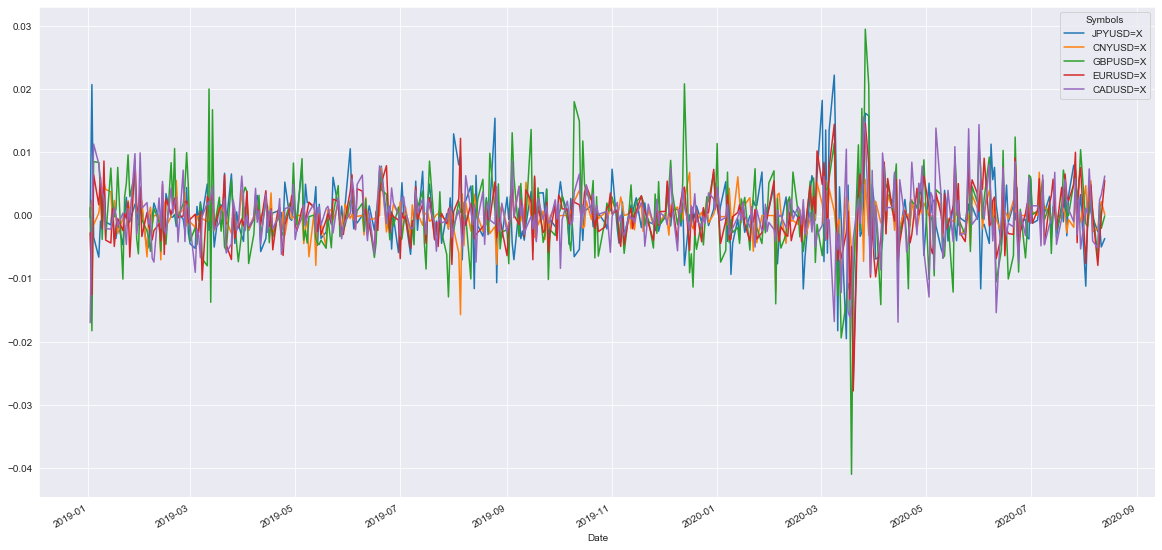

In [2]:
#Taking a glance at the chart for our currency conversion rates in question (PERCENT CHANGE)
currency_data_pct_change = currency_data.pct_change() #calculating the percent change of the equity over the period
currency_data_pct_change.plot(grid=True, figsize=(20, 10));

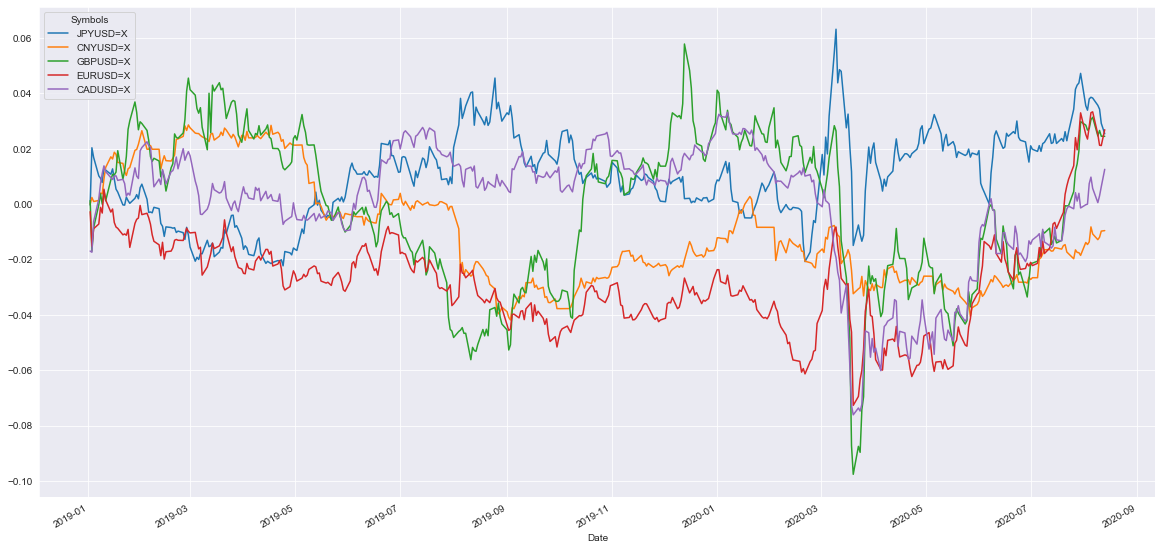

In [3]:
#Taking a look at cumulative returns
cumulative_returns = ((1 + currency_data_pct_change).cumprod() - 1) #calculating the cumulative returns of the equity over the period
cumulative_returns.plot(figsize = (20,10))

### 30/90d Rolling Averages [Raw Exchange Rates]

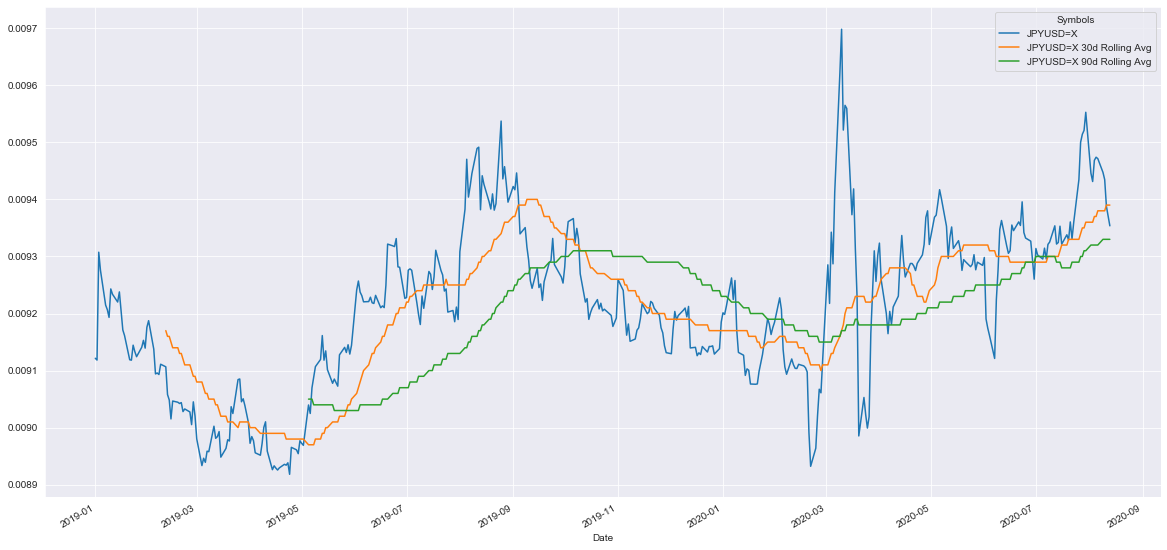

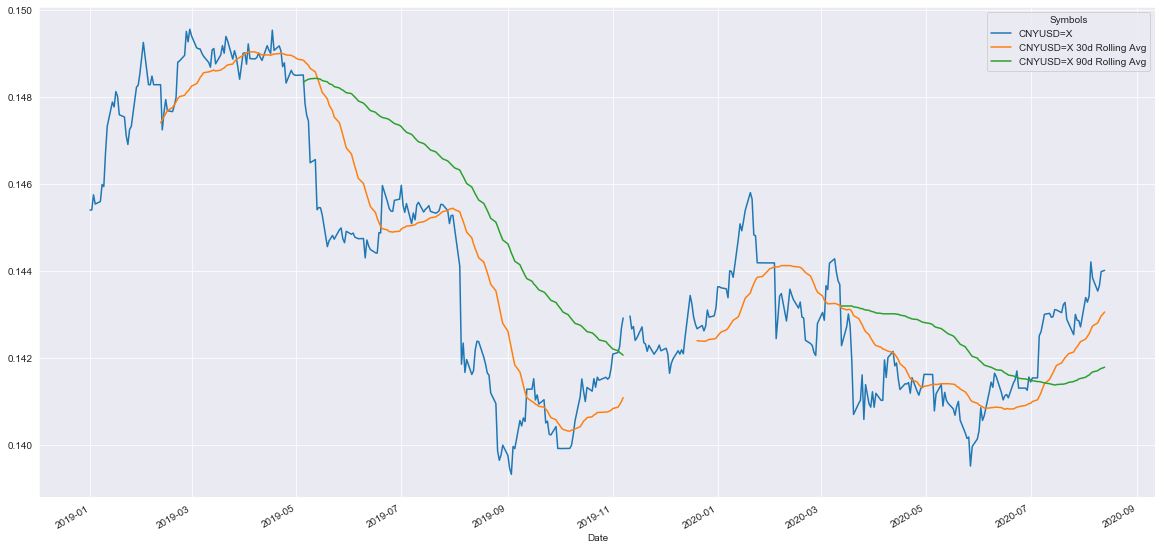

In [4]:
#Calculating 30 & 90 day rolling averages 
#(JPY/USD)
currency_data['JPYUSD=X 30d Rolling Avg'] = np.round(currency_data['JPYUSD=X'].rolling(window=30).mean(), 5) #30d rolling avg
currency_data['JPYUSD=X 90d Rolling Avg'] = np.round(currency_data['JPYUSD=X'].rolling(window=90).mean(), 5) #90d rolling avg
currency_data[['JPYUSD=X', 'JPYUSD=X 30d Rolling Avg', 'JPYUSD=X 90d Rolling Avg']].plot(figsize=(20,10)) #plotting

#(CNY/USD)
currency_data['CNYUSD=X 30d Rolling Avg'] = np.round(currency_data['CNYUSD=X'].rolling(window=30).mean(), 5) #30d rolling avg
currency_data['CNYUSD=X 90d Rolling Avg'] = np.round(currency_data['CNYUSD=X'].rolling(window=90).mean(), 5) #90d rolling avg
currency_data[['CNYUSD=X', 'CNYUSD=X 30d Rolling Avg', 'CNYUSD=X 90d Rolling Avg']].plot(figsize=(20,10))

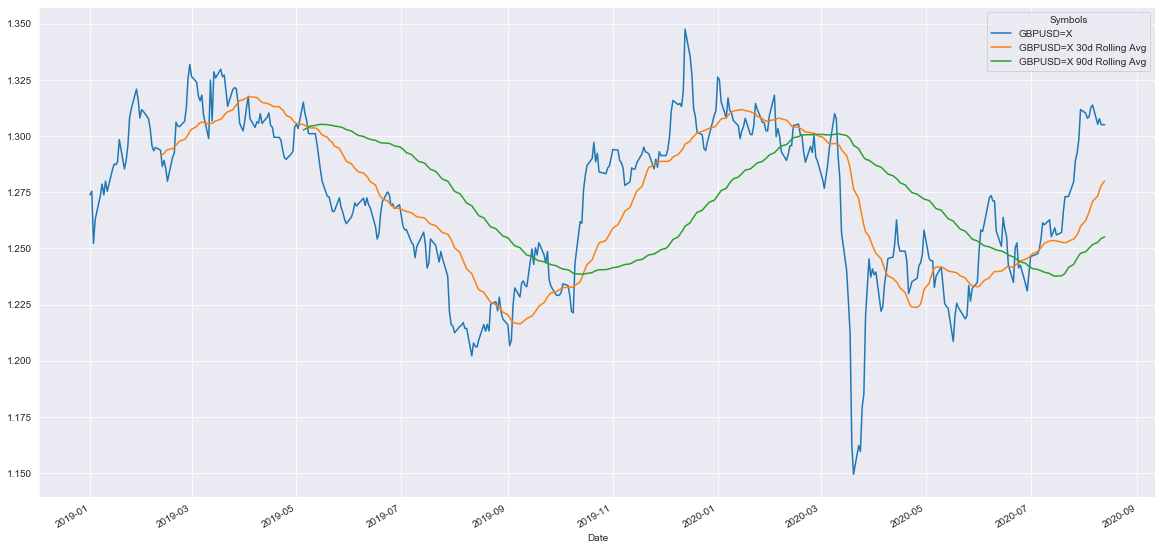

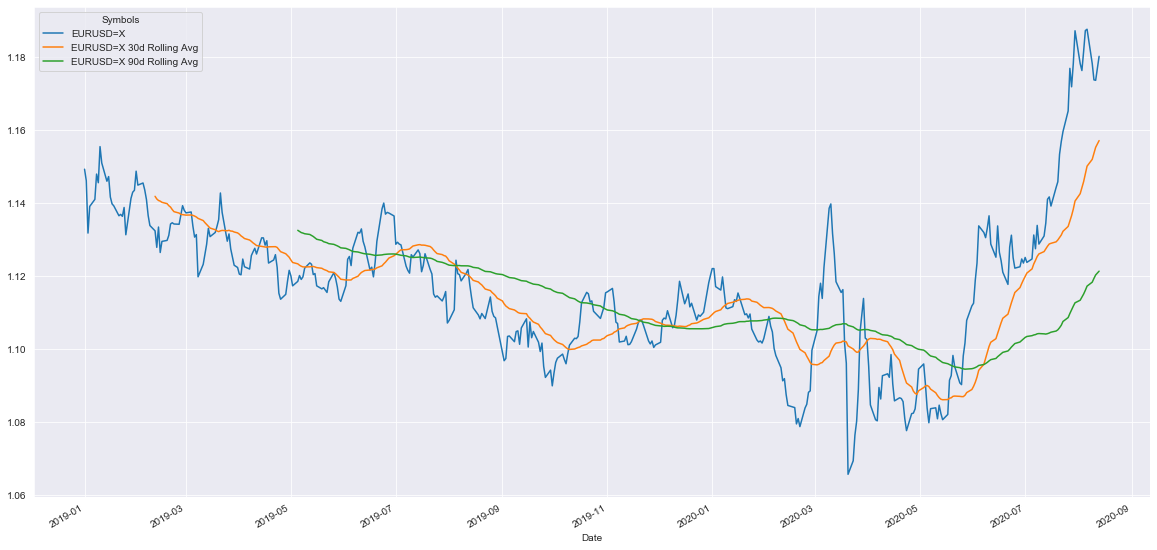

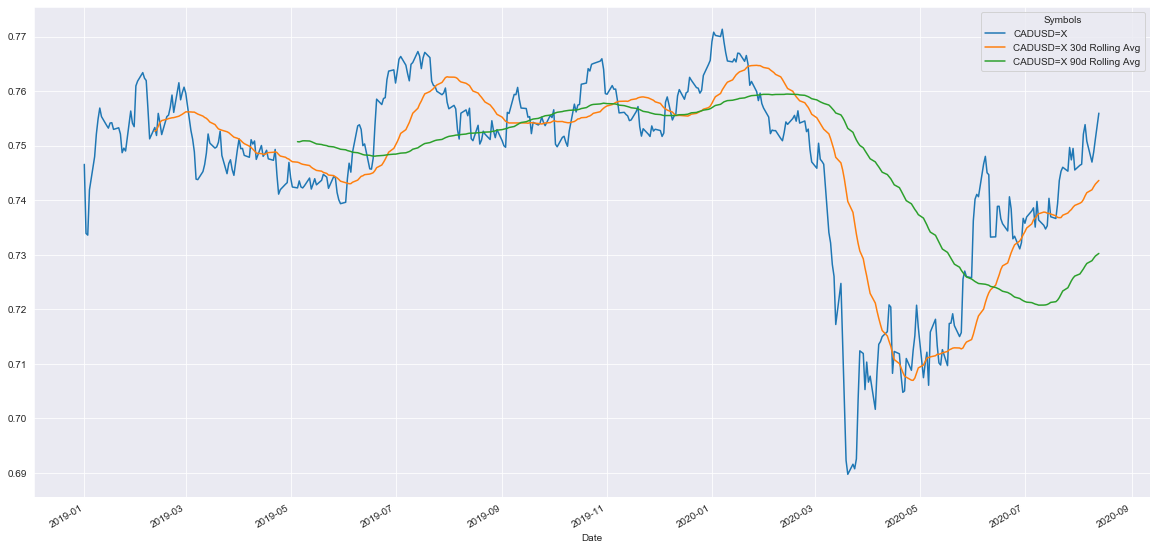

In [5]:
#(GP/USD)
currency_data['GBPUSD=X 30d Rolling Avg'] = np.round(currency_data['GBPUSD=X'].rolling(window=30).mean(), 5) #30d rolling avg
currency_data['GBPUSD=X 90d Rolling Avg'] = np.round(currency_data['GBPUSD=X'].rolling(window=90).mean(), 5) #90d rolling avg
currency_data[['GBPUSD=X', 'GBPUSD=X 30d Rolling Avg', 'GBPUSD=X 90d Rolling Avg']].plot(figsize=(20,10))

#(EUR/USD)
currency_data['EURUSD=X 30d Rolling Avg'] = np.round(currency_data['EURUSD=X'].rolling(window=30).mean(), 5) #30d rolling avg
currency_data['EURUSD=X 90d Rolling Avg'] = np.round(currency_data['EURUSD=X'].rolling(window=90).mean(), 5) #90d rolling avg
currency_data[['EURUSD=X', 'EURUSD=X 30d Rolling Avg', 'EURUSD=X 90d Rolling Avg']].plot(figsize=(20,10))

#(CAD/USD)
currency_data['CADUSD=X 30d Rolling Avg'] = np.round(currency_data['CADUSD=X'].rolling(window=30).mean(), 5) #30d rolling avg
currency_data['CADUSD=X 90d Rolling Avg'] = np.round(currency_data['CADUSD=X'].rolling(window=90).mean(), 5) #90d rolling avg
currency_data[['CADUSD=X', 'CADUSD=X 30d Rolling Avg', 'CADUSD=X 90d Rolling Avg']].plot(figsize=(20,10))

### 30/90d Rolling Averages [Cumulative Returns]

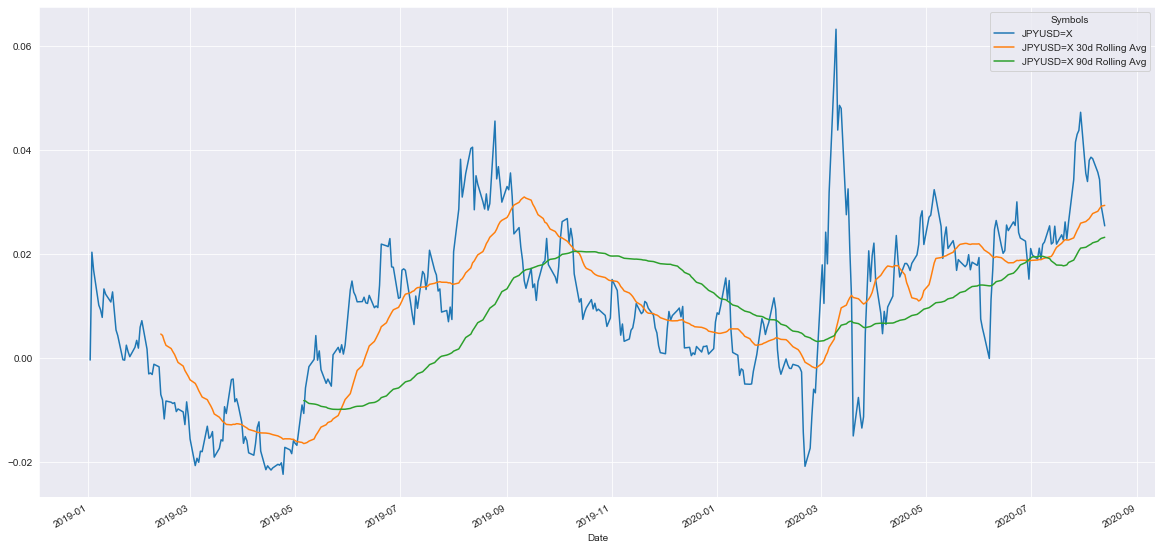

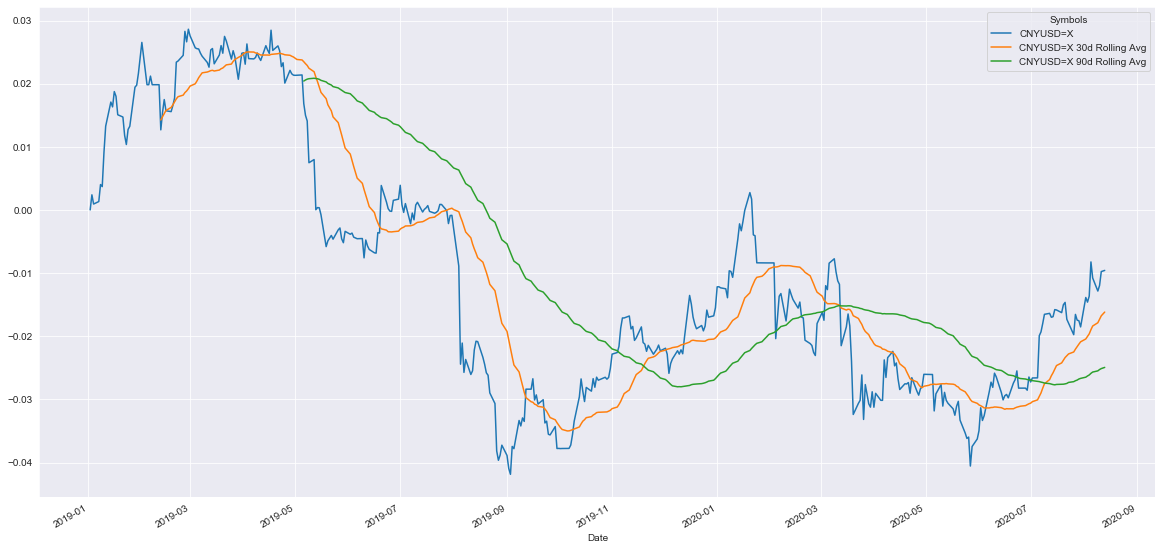

In [6]:
#Calculating 30 & 90 day rolling averages for cumulative returns

#(JPY/USD)
cumulative_returns['JPYUSD=X 30d Rolling Avg'] = np.round(cumulative_returns['JPYUSD=X'].rolling(window=30).mean(), 5) #30d rolling avg
cumulative_returns['JPYUSD=X 90d Rolling Avg'] = np.round(cumulative_returns['JPYUSD=X'].rolling(window=90).mean(), 5) #90d rolling avg
cumulative_returns[['JPYUSD=X', 'JPYUSD=X 30d Rolling Avg', 'JPYUSD=X 90d Rolling Avg']].plot(figsize=(20,10)) 

#(CNY/USD)
cumulative_returns['CNYUSD=X 30d Rolling Avg'] = np.round(cumulative_returns['CNYUSD=X'].rolling(window=30).mean(), 5) #30d rolling avg
cumulative_returns['CNYUSD=X 90d Rolling Avg'] = np.round(cumulative_returns['CNYUSD=X'].rolling(window=90).mean(), 5) #90d rolling avg
cumulative_returns[['CNYUSD=X', 'CNYUSD=X 30d Rolling Avg', 'CNYUSD=X 90d Rolling Avg']].plot(figsize=(20,10)) 

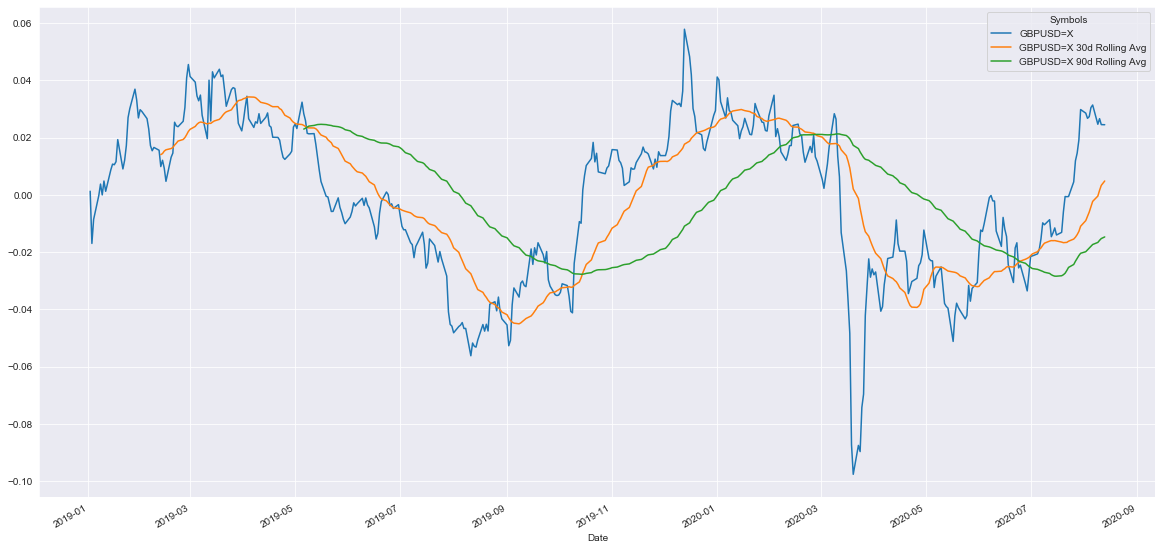

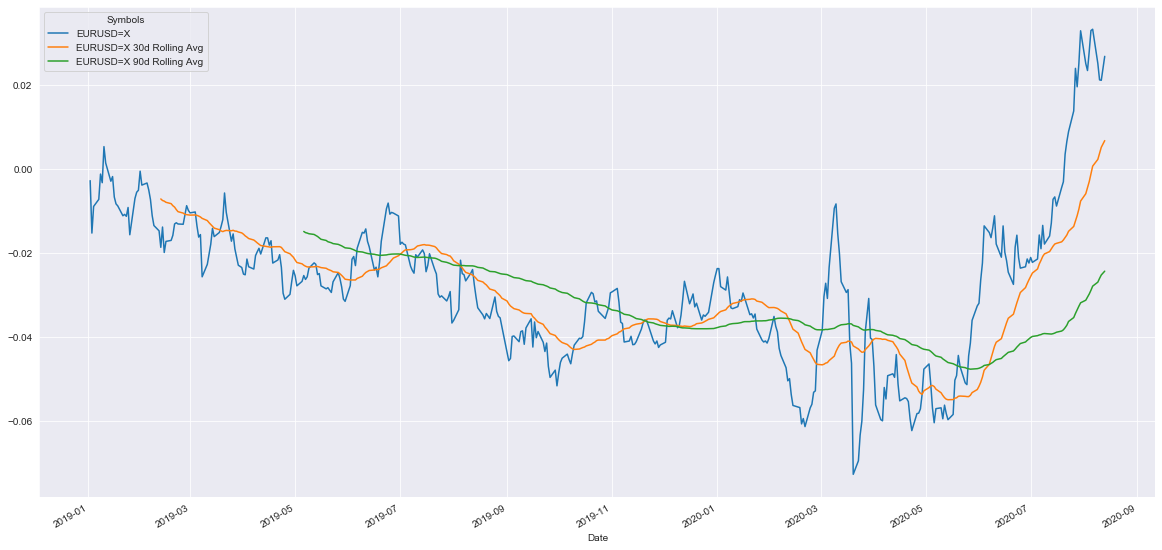

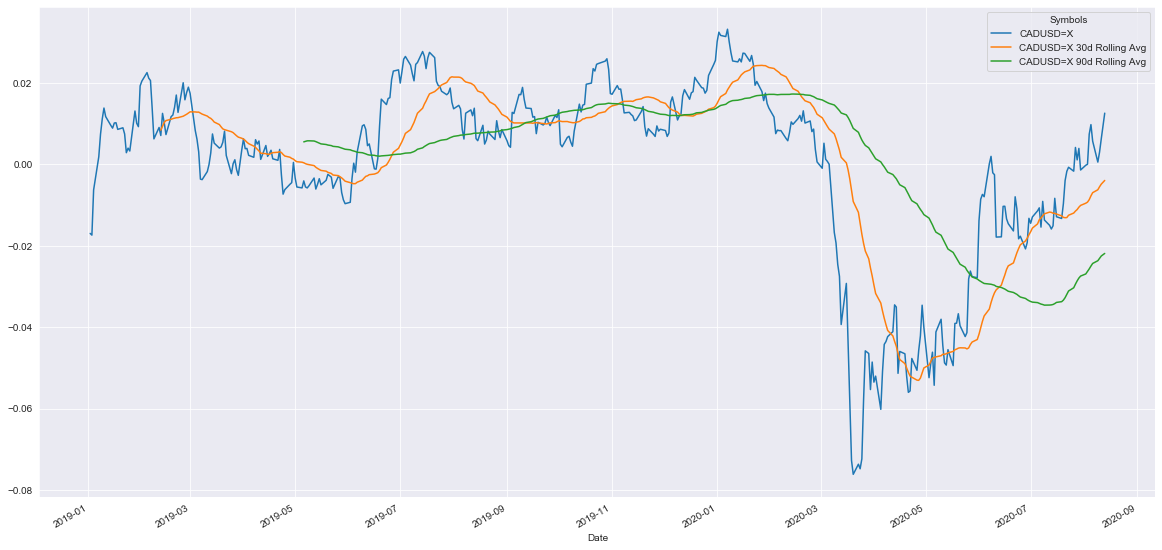

In [7]:
#(AUD/USD)
cumulative_returns['GBPUSD=X 30d Rolling Avg'] = np.round(cumulative_returns['GBPUSD=X'].rolling(window=30).mean(), 5) #30d rolling avg
cumulative_returns['GBPUSD=X 90d Rolling Avg'] = np.round(cumulative_returns['GBPUSD=X'].rolling(window=90).mean(), 5) #90d rolling avg
cumulative_returns[['GBPUSD=X', 'GBPUSD=X 30d Rolling Avg', 'GBPUSD=X 90d Rolling Avg']].plot(figsize=(20,10)) 

#(EUR/USD)
cumulative_returns['EURUSD=X 30d Rolling Avg'] = np.round(cumulative_returns['EURUSD=X'].rolling(window=30).mean(), 5) #30d rolling avg
cumulative_returns['EURUSD=X 90d Rolling Avg'] = np.round(cumulative_returns['EURUSD=X'].rolling(window=90).mean(), 5) #90d rolling avg
cumulative_returns[['EURUSD=X', 'EURUSD=X 30d Rolling Avg', 'EURUSD=X 90d Rolling Avg']].plot(figsize=(20,10)) 

#(CAD/USD)
cumulative_returns['CADUSD=X 30d Rolling Avg'] = np.round(cumulative_returns['CADUSD=X'].rolling(window=30).mean(), 5) #30d rolling avg
cumulative_returns['CADUSD=X 90d Rolling Avg'] = np.round(cumulative_returns['CADUSD=X'].rolling(window=90).mean(), 5) #90d rolling avg
cumulative_returns[['CADUSD=X', 'CADUSD=X 30d Rolling Avg', 'CADUSD=X 90d Rolling Avg']].plot(figsize=(20,10)) 

### Determining the Overall Return & Volatility of Each Currency

In [8]:
#(JPY/USD)

#Return
currency_data['JPYUSD=X Return'] = np.log(currency_data['JPYUSD=X']/currency_data['JPYUSD=X'].shift(1))
#30d moving volatility 
currency_data['JPYUSD=X Mov_Volatility'] = currency_data['JPYUSD=X Return'].rolling(window=30).std()* math.sqrt(30) #30d rolling avg

#(CNY/USD)

#Return (CNY/USD)
currency_data['CNYUSD=X Return'] = np.log(currency_data['CNYUSD=X']/currency_data['CNYUSD=X'].shift(1))
#30d moving volatility 
currency_data['CNYUSD=X Mov_Volatility'] = currency_data['CNYUSD=X Return'].rolling(window=30).std()* math.sqrt(30) #30d rolling avg

#(GBP/USD)

#Return (GBP/USD)
currency_data['GBPUSD=X Return'] = np.log(currency_data['GBPUSD=X']/currency_data['GBPUSD=X'].shift(1))
#30d moving volatility 
currency_data['GBPUSD=X Mov_Volatility'] = currency_data['GBPUSD=X Return'].rolling(window=30).std()* math.sqrt(30) #30d rolling avg

#(EUR/USD)

#Return (EUR/USD)
currency_data['EURUSD=X Return'] = np.log(currency_data['EURUSD=X']/currency_data['EURUSD=X'].shift(1))
#30d moving volatility 
currency_data['EURUSD=X Mov_Volatility'] = currency_data['EURUSD=X Return'].rolling(window=30).std()* math.sqrt(30) #30d rolling avg

#(CAD/USD)

#Return (CAD/USD)
currency_data['CADUSD=X Return'] = np.log(currency_data['CADUSD=X']/currency_data['CADUSD=X'].shift(1))
#30d moving volatility 
currency_data['CADUSD=X Mov_Volatility'] = currency_data['CADUSD=X Return'].rolling(window=30).std()* math.sqrt(30) #30d rolling avg


### Visualizing Trends

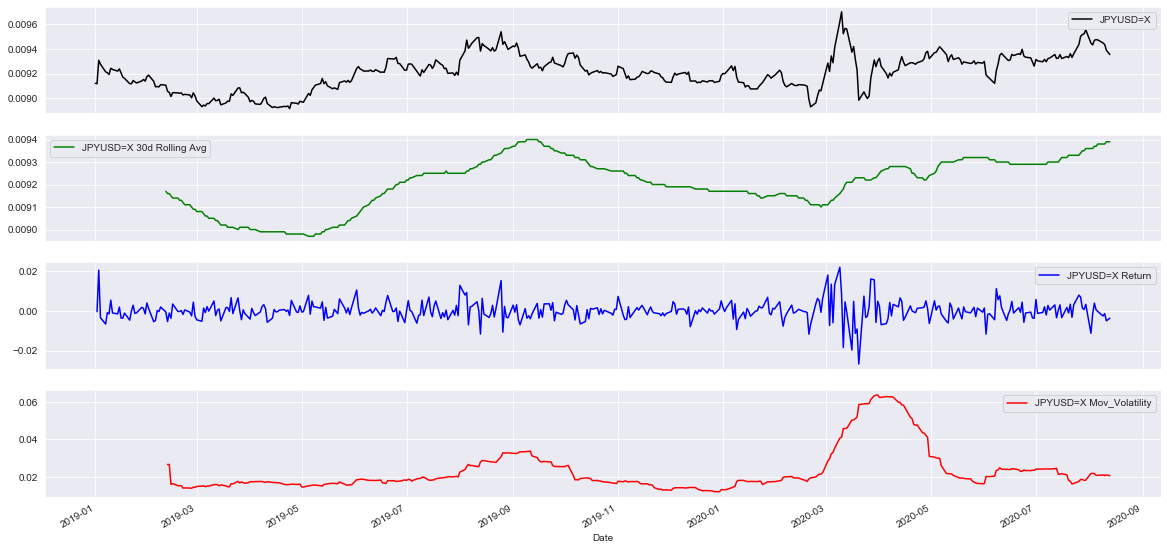

In [9]:
#Visualizing the results

#(JPY/USD)
currency_data[['JPYUSD=X','JPYUSD=X 30d Rolling Avg','JPYUSD=X Return','JPYUSD=X Mov_Volatility']].plot(subplots=True, style=['black','green','blue','red'],figsize=(20, 10));

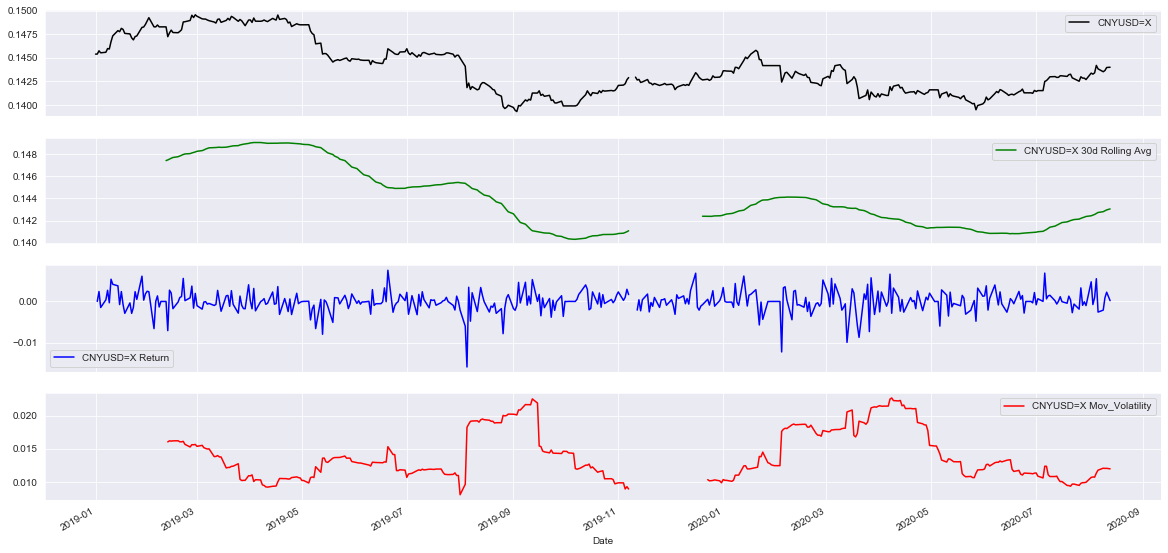

In [10]:
#(CNY/USD)
currency_data[['CNYUSD=X','CNYUSD=X 30d Rolling Avg','CNYUSD=X Return','CNYUSD=X Mov_Volatility']].plot(subplots=True, style=['black','green','blue','red'],figsize=(20, 10));

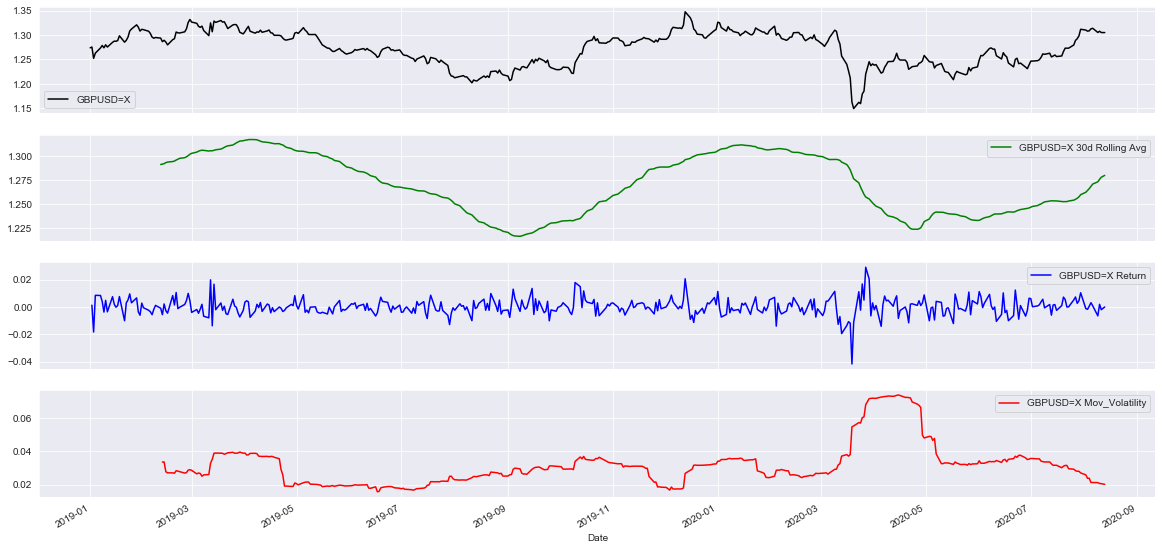

In [11]:
#(GBP/USD)
currency_data[['GBPUSD=X','GBPUSD=X 30d Rolling Avg','GBPUSD=X Return','GBPUSD=X Mov_Volatility']].plot(subplots=True, style=['black','green','blue','red'],figsize=(20, 10));

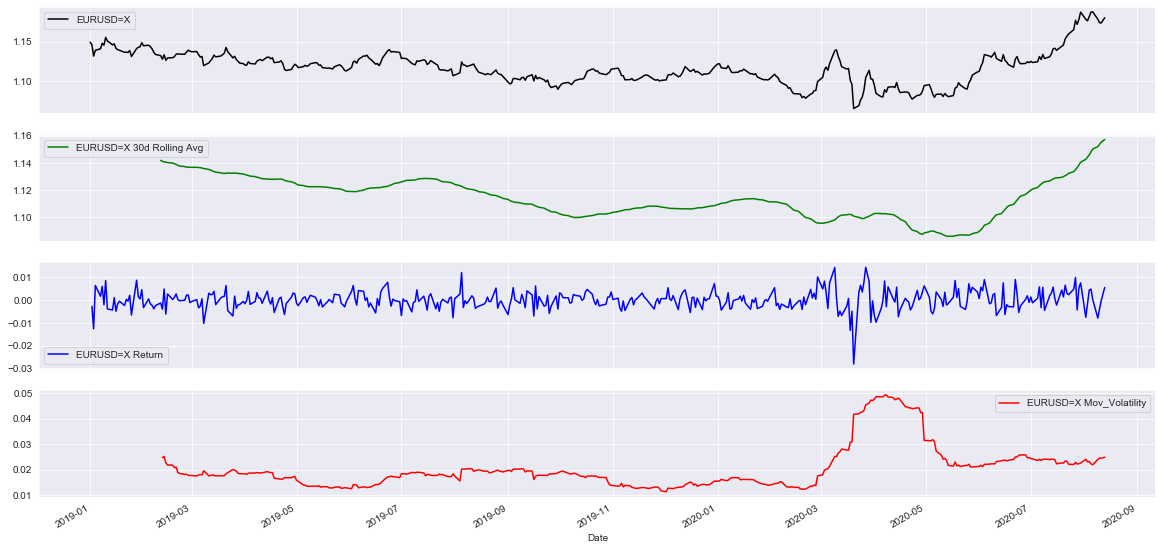

In [12]:
#(EUR/USD)
currency_data[['EURUSD=X','EURUSD=X 30d Rolling Avg','EURUSD=X Return','EURUSD=X Mov_Volatility']].plot(subplots=True, style=['black','green','blue','red'],figsize=(20, 10));

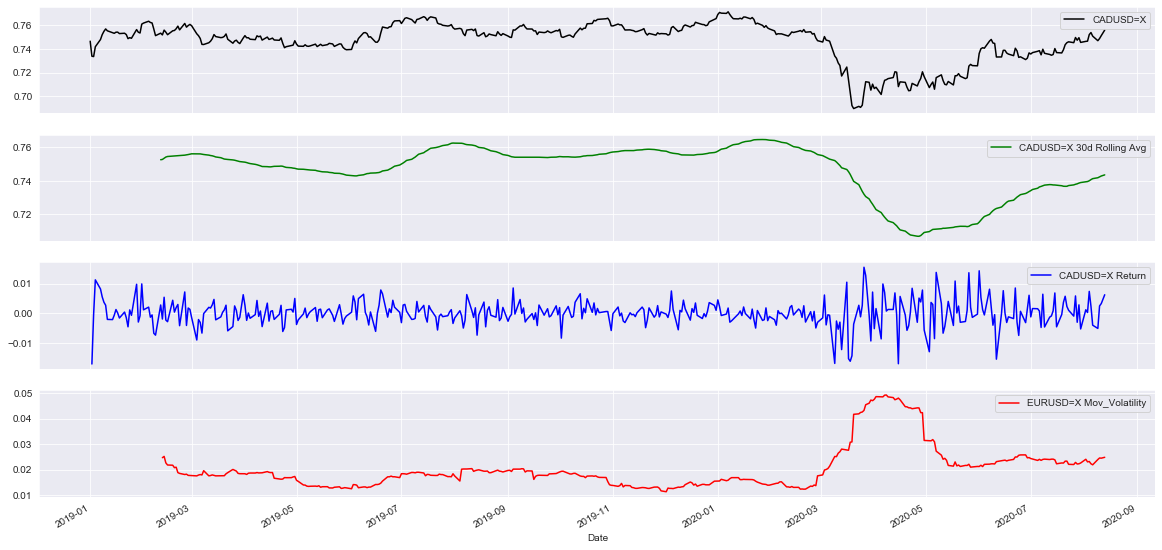

In [13]:
#(CAD/USD)
currency_data[['CADUSD=X','CADUSD=X 30d Rolling Avg','CADUSD=X Return','EURUSD=X Mov_Volatility']].plot(subplots=True, style=['black','green','blue','red'],figsize=(20, 10));

### Optimizing Cash Weights

In [14]:
#Defining the currencies we deal with (all /USD)
currency_tickers = ['JPYUSD=X','CNYUSD=X','GBPUSD=X','EURUSD=X','CADUSD=X']

#Calculating number of currencies we're dealing with
size_portfolio = len(currency_tickers)

#Getting the most up to date data we can
today = date.today() #This function automatically updates with today's data


#Pulling the timeseries data directly from yahoo finance into a dataframe
currency_data= data.DataReader(currency_tickers, 
                       start='2019-1-1', #selecting the starting date
                       end = today, #charting up to today's date
                       data_source='yahoo')['Adj Close'] #obtaining price at close

#Calculating returns
currency_returns = np.log(currency_data/currency_data.shift(1))

#Calculating average return over a year's worth of trading days
currency_returns.mean()*253

#Calculating covariance over a years's worth of trading days
currency_returns.cov()*253

Symbols,JPYUSD=X,CNYUSD=X,GBPUSD=X,EURUSD=X,CADUSD=X
Symbols,,,,,
JPYUSD=X,0.005634,0.000198,0.001617,0.002057,-0.000071
CNYUSD=X,0.000198,0.001688,0.001078,0.000511,0.000678
GBPUSD=X,0.001617,0.001078,0.009707,0.003294,0.003093
EURUSD=X,0.002057,0.000511,0.003294,0.004230,0.001757
CADUSD=X,-0.000071,0.000678,0.003093,0.001757,0.004866


### Calculating Expected Return, Var & Vol for One Possible Set of Cash Weights

In [15]:
#Creating random position weights
weights = np.random.random(size_portfolio) #creating random position percentages
weights = weights/np.sum(weights) #scaling weights
weights

array([0.15215186, 0.26265037, 0.15118717, 0.25044647, 0.18356412])

In [16]:
#Calculating expected portfolio return with random weights
np.sum(currency_returns.mean()*weights)*253

0.008319926385789569

In [17]:
#Calculating expected portfolio variance with random weights

#Taking the dot product of the transpose weights array and the portfolio returns matrix
np.dot(weights.T, np.dot(currency_returns.cov() * 253, weights))

0.0019420636535125786

In [18]:
#Calculating expected portfolio volatility with random weights
np.sqrt(np.dot(weights.T, np.dot(currency_returns.cov() * 253, weights)))

0.04406885128424133

### Calculating Expected Return, Var & Vol for Five Thousand [5000] Potential Cash Weights Via Monte Carlo

In [19]:
#Creating empty arrays to store our values
pred_returns = [] 
pred_volatility = []

#Defining a for loop to perform the calculations we did above but this time we'll do it 5000 times
#Calculations and code are the exact same as above just now a for loop performs them for us over and over again
#Every iteration np.random will produce a new randomly weighted portfolio for us to try
for i in range (5000):
    weights = np.random.random(size_portfolio)
    weights /= np.sum(weights)
    pred_returns.append(np.sum(currency_returns.mean() * weights) * 253)
    pred_volatility.append(np.sqrt(np.dot(weights.T, np.dot(currency_returns.cov() * 253, weights))))

#Appending our results to the arrays we created above
pred_returns = np.array(pred_returns)
pred_volatility = np.array(pred_volatility)

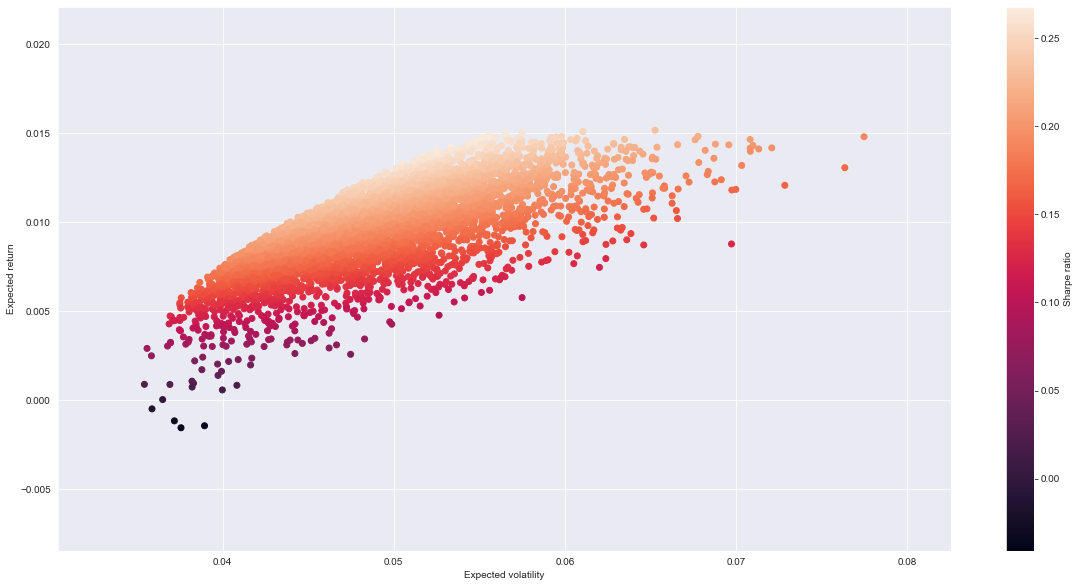

In [20]:
#Visualizing our results
plt.figure(figsize=(20, 10))
plt.scatter(pred_volatility, pred_returns, c = pred_returns / pred_volatility, marker='o')
plt.xlabel('Expected volatility')
plt.ylabel('Expected return')
plt.colorbar(label='Sharpe ratio');

### Optimizing Cash Weightings Mathematically

In [21]:
#This function takes in an array of portfolio weights as an input and returns an array of the predicted returns, voltatility
#and Sharpe ratios (automating the same calculations done above)
def stats(weights):
    weights = np.array(weights)
    pred_returns = np.sum(currency_returns.mean() * weights) * 253
    pred_volatility = np.sqrt(np.dot(weights.T, np.dot(currency_returns.cov() * 253, weights)))
    return np.array([pred_returns,pred_volatility,pred_returns / pred_volatility])

In [22]:
#Creating a function to minimize the Sharpe ratio
def min_sharpe_func(weights):
    return -stats(weights)[2]

#Creating a list of constraints for the optimization 
constraints = ({'type': 'eq', 'fun': lambda x:  np.sum(x) - 1})

#Creating a list of bounds for the optimiation
bounds = tuple((0, 1) for x in range(size_portfolio))

#Scaling our portfolio weights and creating a nice array
scaled = size_portfolio * [1./ size_portfolio,]

#Running the optimization function for Sharpe ratio
opts_Sharpe = sco.minimize(min_sharpe_func, scaled, method='SLSQP',
                       bounds=bounds, constraints=constraints)

In [23]:
#Extracting optimal weights rounded to 3 decimal places
print('OPTIMAL CASH WEIGHTS FOR SHARPE RATIO [JPY, CNY, GBP, EUR, CAD]')
print((opts_Sharpe['x']).round(3))

#Extracting pred returns, volatility & Sharpe ratio using our stats() function
print('PREDICTED RESULTS FOR OPTIMAL SHARPE RATIO CASH WEIGHTS [RETURN, VOLATILITY, SHARPE RATIO]')
print(stats(opts_Sharpe['x'].round(3)))

OPTIMAL CASH WEIGHTS FOR SHARPE RATIO [JPY, CNY, GBP, EUR, CAD]
[0.331 0.    0.035 0.528 0.106]
PREDICTED RESULTS FOR OPTIMAL SHARPE RATIO CASH WEIGHTS [RETURN, VOLATILITY, SHARPE RATIO]
[0.01472788 0.05436915 0.2708866 ]


In [24]:
#Repeating for variance
def min_variance_func(weights):
    return stats(weights)[1]**2

#Optimizing using same contraints and bounds as before
opts_variance = sco.minimize(min_variance_func, size_portfolio * [1. / size_portfolio,], method='SLSQP',
                       bounds=bounds, constraints=constraints)

In [25]:
#Extracting optimal weights rounded to 3 decimal places
print('OPTIMAL CASH WEIGHTS FOR OPTIMAL VARIANCE [JPY, CNY, GBP, EUR, CAD]')
print((opts_variance['x']).round(3))

#Extracting pred returns, volatility & Sharpe ratio using our created stats() function
print('PREDICTED OUTCOMES FOR OPTIMAL VARIANCE CASH WEIGHTS [RETURN, VOLATILITY, SHARPE RATIO]')
print(stats(opts_variance['x'].round(3)))

OPTIMAL CASH WEIGHTS FOR OPTIMAL VARIANCE [JPY, CNY, GBP, EUR, CAD]
[0.164 0.607 0.    0.056 0.173]
PREDICTED OUTCOMES FOR OPTIMAL VARIANCE CASH WEIGHTS [RETURN, VOLATILITY, SHARPE RATIO]
[0.00102578 0.03488448 0.02940509]


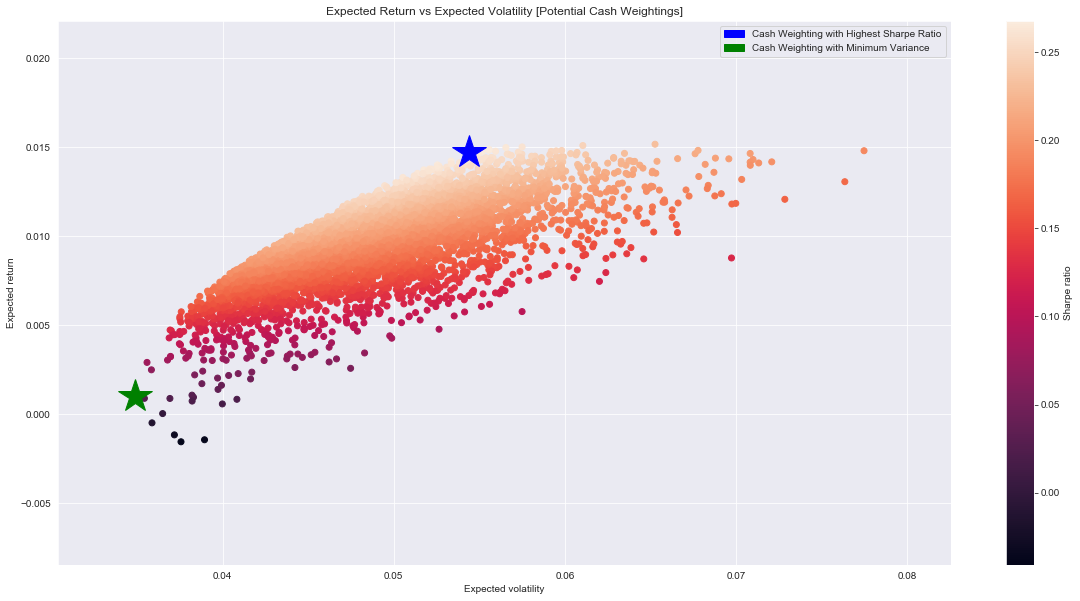

In [26]:
#Visualizing our results
plt.figure(figsize=(20, 10))

#Plotting potential random portfolio compositions
plt.scatter(pred_volatility, pred_returns, c = pred_returns / pred_volatility, marker='o')

#Plotting porftolio with highest Sharpe ratio (Blue)
plt.plot(stats(opts_Sharpe['x'])[1], stats(opts_Sharpe['x'])[0],
         'b*', markersize=35.0)

#Plotting minimum variance portfolio (Green)
plt.plot(stats(opts_variance['x'])[1], stats(opts_variance['x'])[0],
         'g*', markersize=35.0)

#Creating legend
import matplotlib.patches as mpatches
blue = mpatches.Patch(color='b', label='Cash Weighting with Highest Sharpe Ratio')
green = mpatches.Patch(color='g', label='Cash Weighting with Minimum Variance')
plt.legend(handles=[blue,green])

#Creating labels
plt.title('Expected Return vs Expected Volatility [Potential Cash Weightings]')
plt.xlabel('Expected volatility')
plt.ylabel('Expected return')
plt.colorbar(label='Sharpe ratio');